kesifsel veri analizi EDA

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.metrics import precision_score, confusion_matrix
from sklearn import tree

In [6]:
df= pd.read_csv("water_potability.csv")

In [7]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [8]:
describle = df.describe
describle().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


dependent variable analysis(bagimli dgisken analizi)

In [10]:
d = pd.DataFrame(df["Potability"].value_counts())

In [11]:
d.head()

,count
Potability,
0,1998
1,1278


In [12]:
d = d.reset_index()
d.head()

,Potability,count
0,0,1998
1,1,1278


In [13]:
fig = px.pie(d, values= "count", names = ["Not Potable", "Potable"], hole=0.35, opacity=0.8,labels={"Label":"Potability", "Potability":"Number of Samples"})

In [14]:
fig.update_layout(title=dict(text= "Pie Chart of Potability Feature"))
fig.update_traces(textposition="outside",textinfo="percent+label")
fig.show()
fig.write_html("potability_pie_chart.html")

Korelasyon analiz

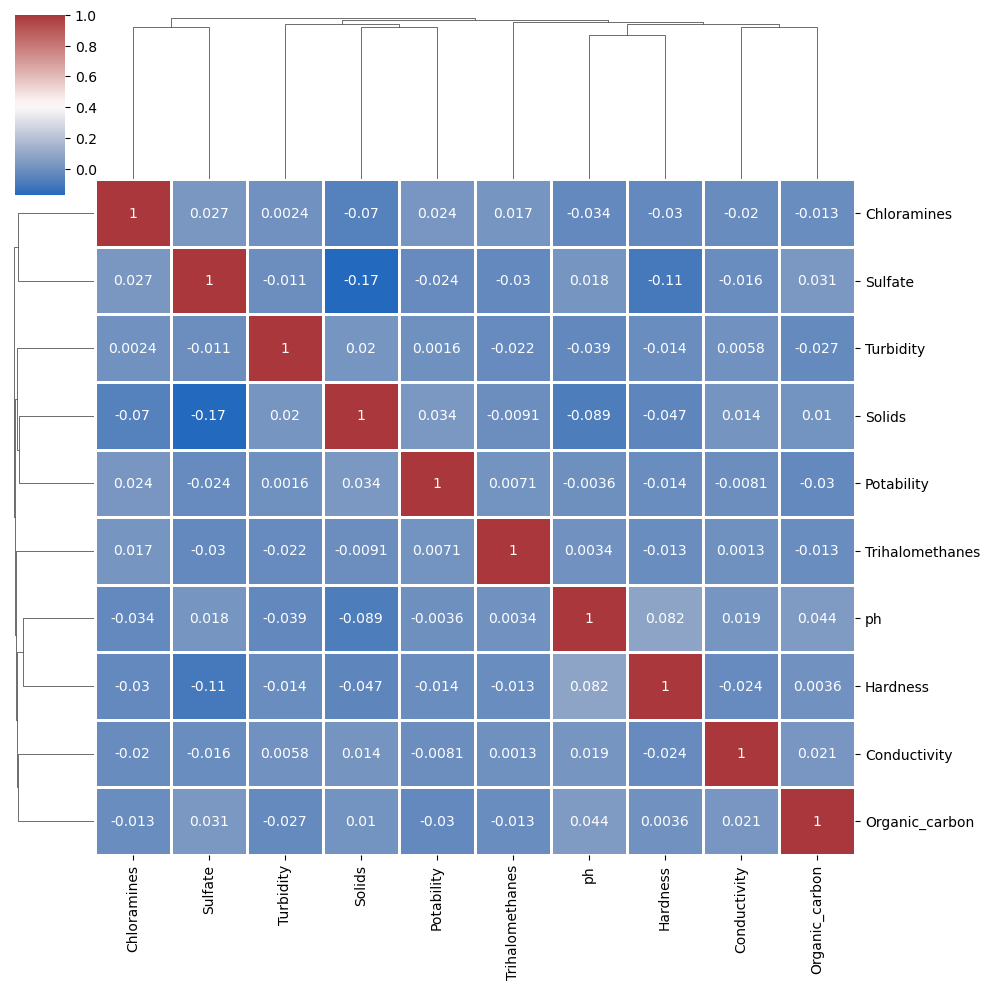

In [15]:
sns.clustermap( df.corr(), cmap="vlag", dendrogram_ratio= (0.1, 0.2), annot=True, linewidths=0.8, figsize=(10, 10) )
plt.show()

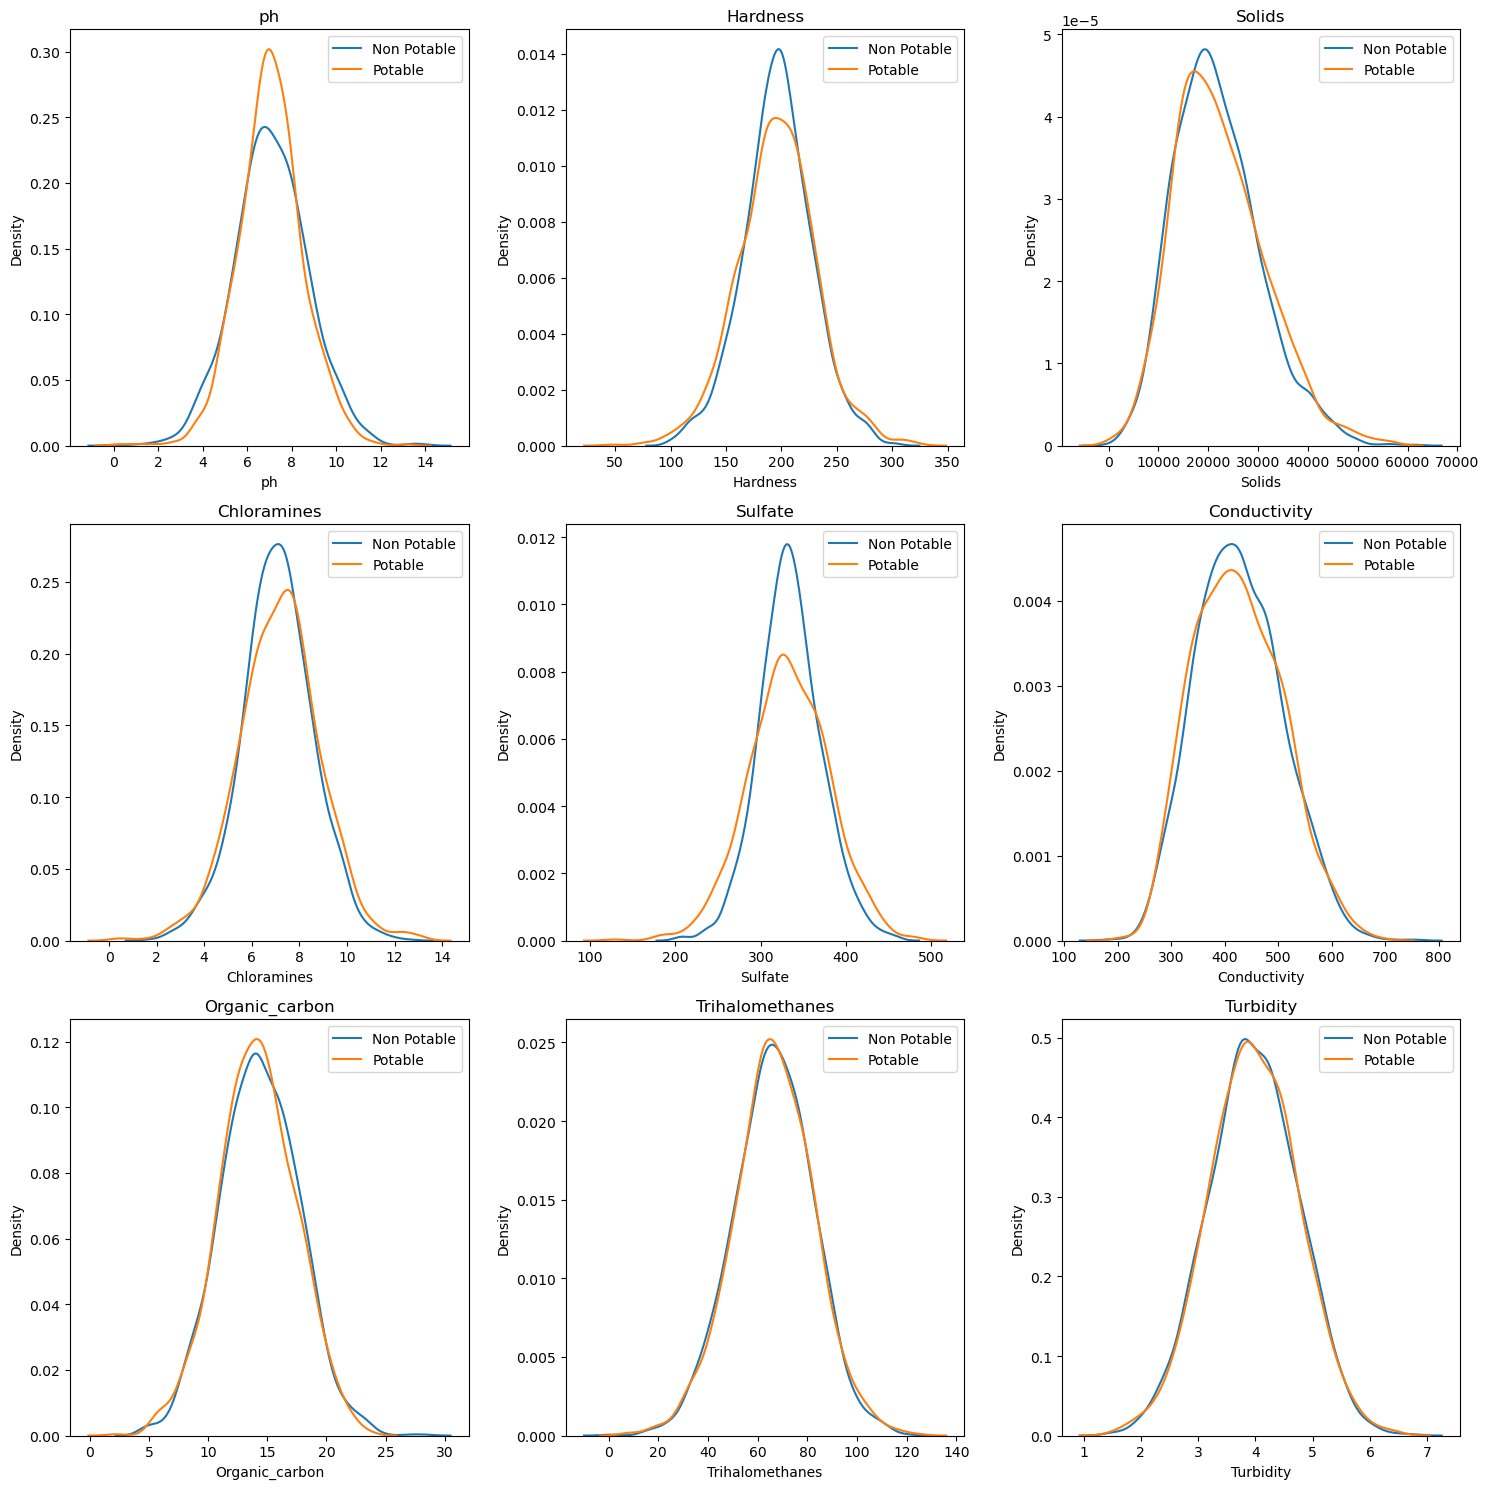

In [16]:
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize= (15, 15))
for ax,col in enumerate(df.columns[:9]):
    plt.subplot(3, 3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label ="Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()

plt.tight_layout()

missing value

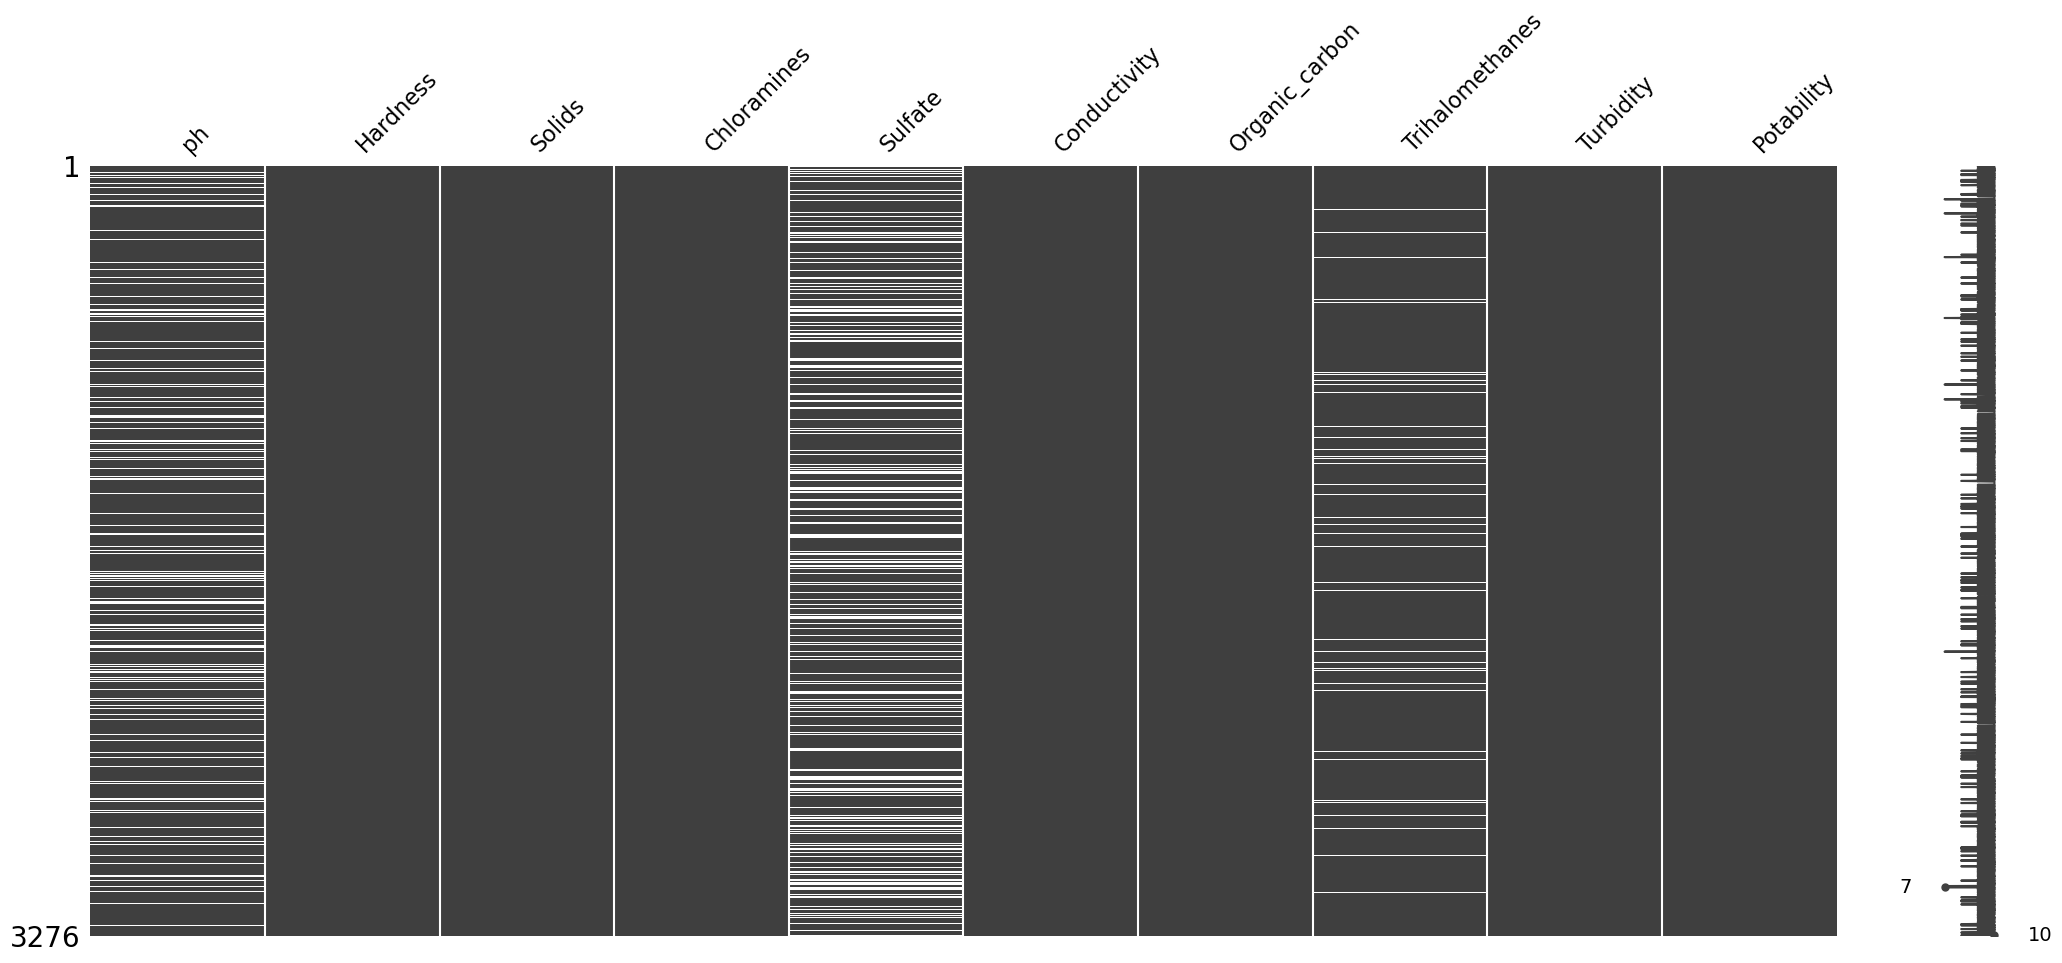

In [17]:
msno.matrix(df)
plt.show()

In [18]:
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


proprocessing: Missing vlue problem, train-test split, normalization

In [19]:
#df["ph"].fillna(value = df["ph"].mean(), inplace= True) 
# # bu direk hepsinin ortalamasını alir ve boş olanalra yazdiirr ama amacımız bu değil, aşşağida direk potimility1 olanlrın ortlamsınını ona grie 0 olanların ortlasmanıı 0 a göre ayarladık

In [20]:
'''
ph_mean_0 = df[df["Potability"]==0]["ph"].mean()
ph_mean_1 = df[df["Potability"]==1]["ph"].mean()

for i in range(len(df)):
    if pd.isna(df.loc[i, "ph"]):
        if df.loc[i, "Potability"] == 0:
            df.loc[i, "ph"] = ph_mean_0
        else:
            df.loc[i, "ph"] = ph_mean_1 
'''
#daha kısasını buldum
ph_mean_0 = df[df["Potability"]==0]["ph"].mean()
ph_mean_1 = df[df["Potability"]==1]["ph"].mean()
df["ph"] = df["ph"].fillna(df["Potability"].map({ 0: ph_mean_0, 1: ph_mean_1 }))

In [21]:
print(df.isnull().sum())

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [22]:
# boşlarnalrı da ortaalamayla dolduruyorum
df["Sulfate"].fillna(value = df["Sulfate"].mean(), inplace= True)
df["Trihalomethanes"].fillna(value = df["Trihalomethanes"].mean(), inplace= True)

C:\Users\Mehmet Nur Kavan\AppData\Local\Temp\ipykernel_24008\1213528121.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Mehmet Nur Kavan\AppData\Local\Temp\ipykernel_24008\1213528121.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

In [23]:
print(df.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


train test splite

In [24]:
x = df.drop("Potability", axis=1).values #independent değger, bagimsiz degerimiz
y= df["Potability"].values #target degeri potable or non potable

In [25]:
x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

min-max normalization 0-1

In [26]:
x_train_max = np.max(x_train)
x_train_min = np.min(x_train)
x_train = (x_train - x_train_min) / (x_train_max - x_train_min)
x_test = (x_test - x_train_min) / (x_train_max - x_train_min)

Modleing: decision tree and random forest

[('DIC', 0.72), ('RF', 0.7614678899082569)]


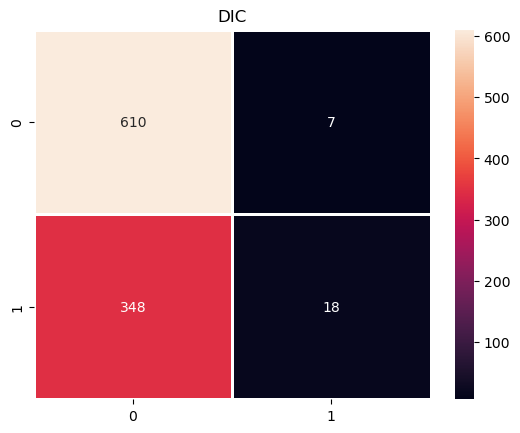

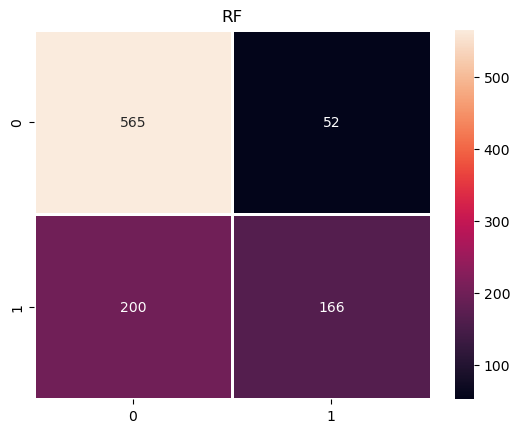

In [27]:
models = [('DIC', DecisionTreeClassifier(max_depth=3,)),
          ('RF', RandomForestClassifier())]

FinalResult = [] #score
cmList = [] # confision matrix list

for name, model in models:
    model.fit(x_train, y_train)
    model_result = model.predict(x_test)
    score = precision_score(y_test, model_result)
    FinalResult.append((name,score))
    cm = confusion_matrix(y_test, model_result)
    cmList.append((name,cm))

print(FinalResult)

for name, i in cmList:
    plt.figure()
    sns.heatmap(i, annot=True, linewidths=0.8, fmt=".0f")
    plt.title(name)
    plt.show()

Evulation: decision tree visualitation

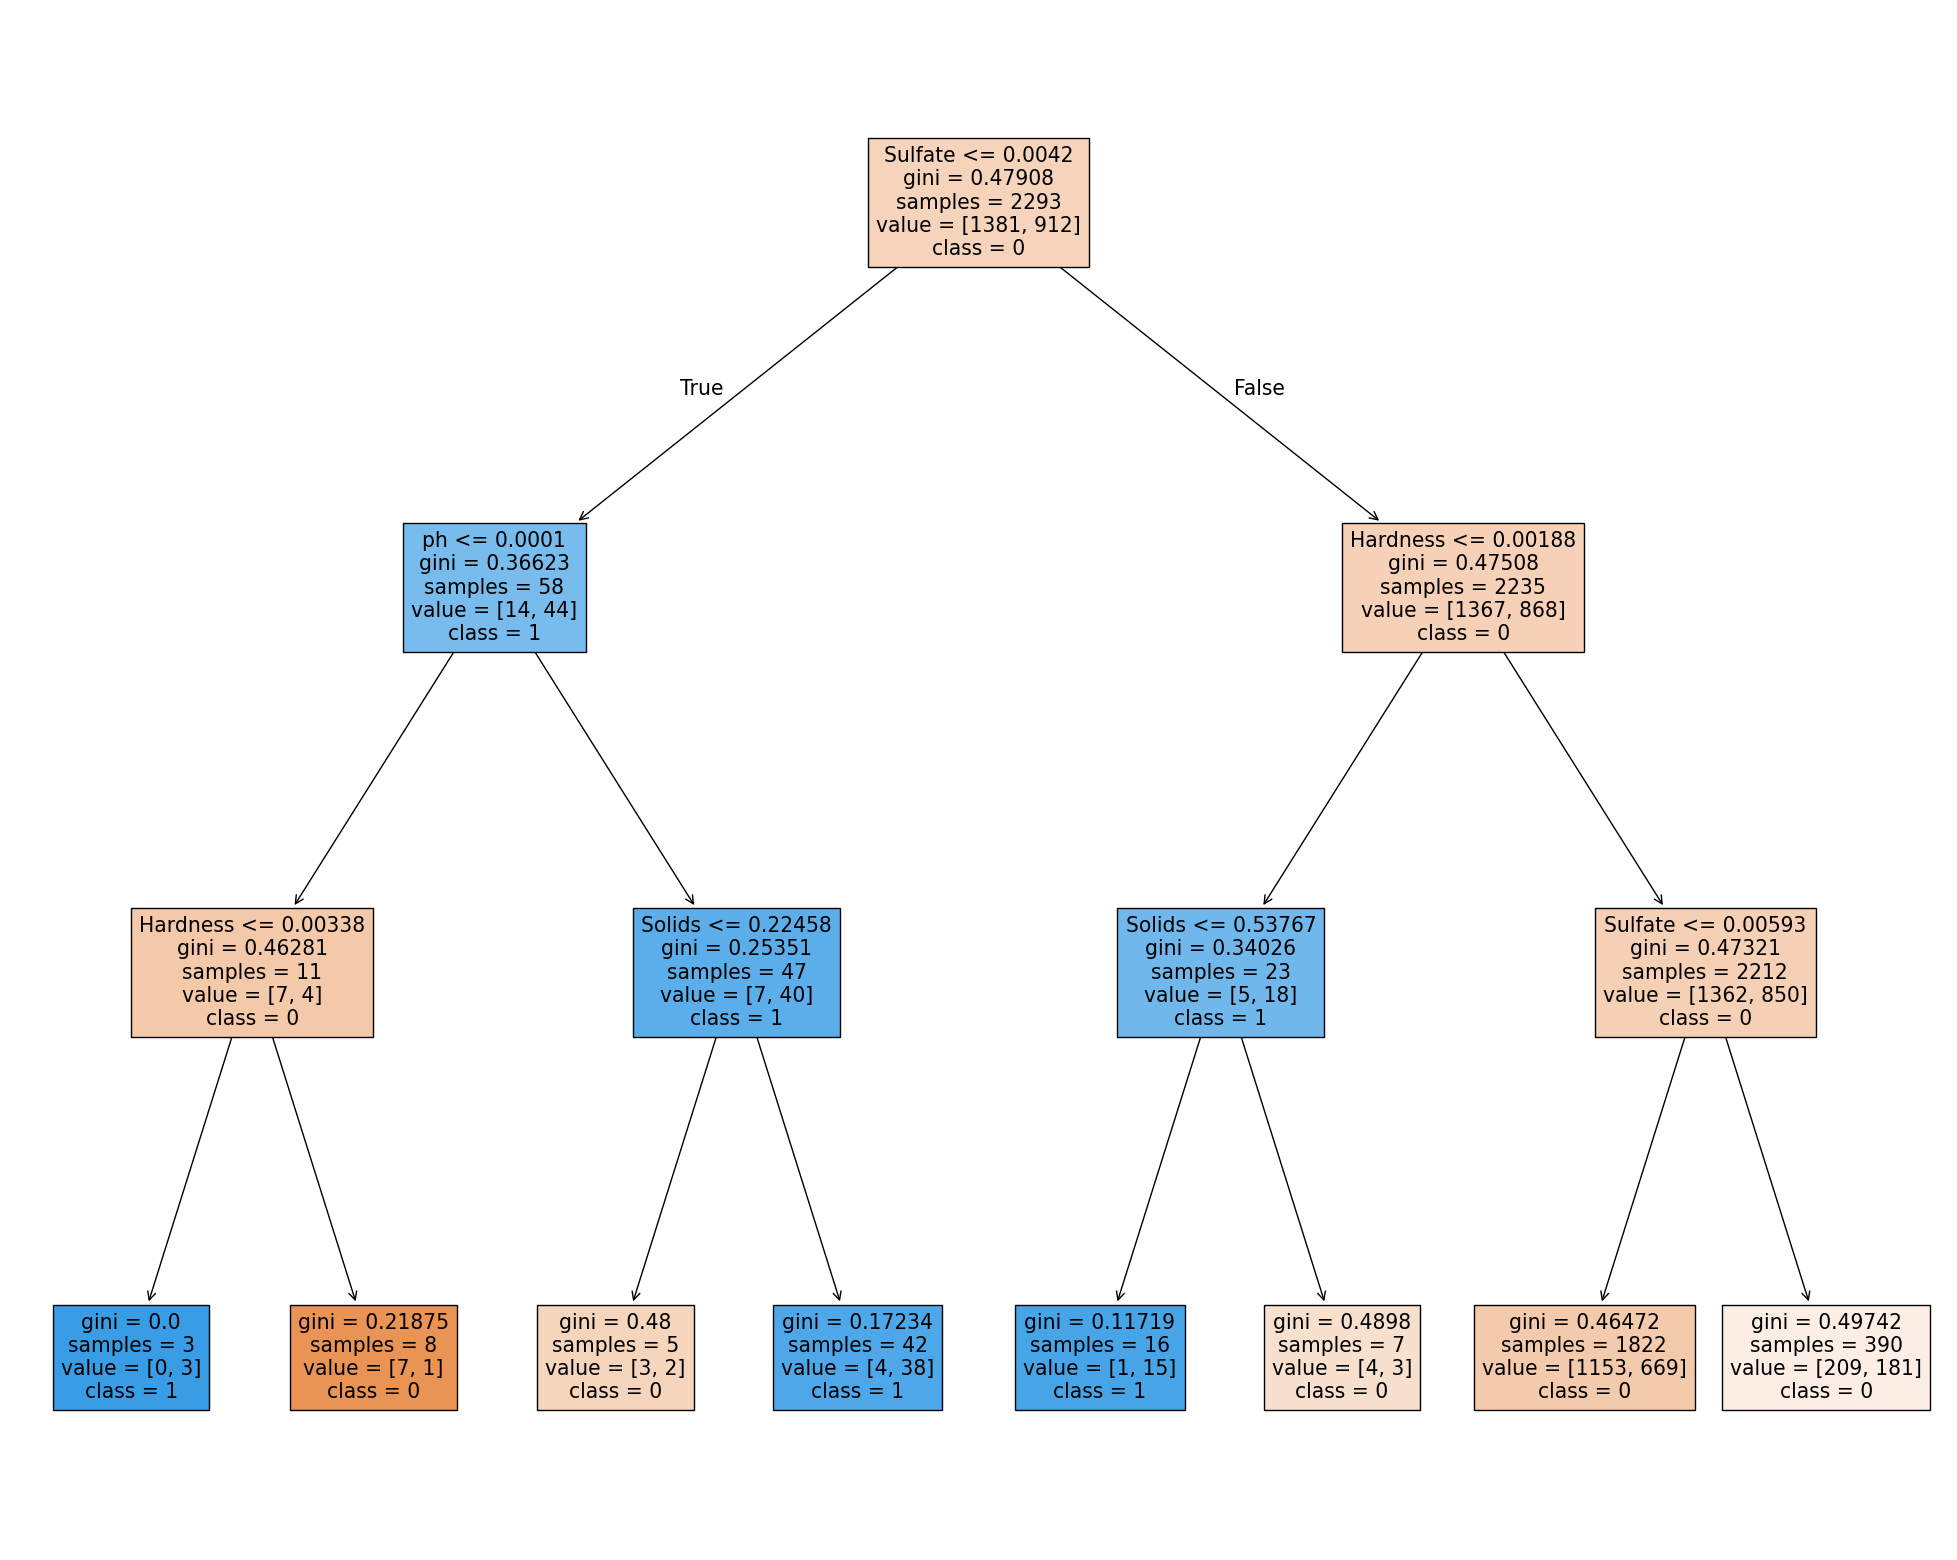

In [31]:
dt_clf = models[0][1]
plt.figure(figsize = (25, 20) )
tree.plot_tree(dt_clf, feature_names = df.columns.tolist()[:-1], class_names = ["0", "1"], filled= True, precision = 5)
plt.show()

Hyperparameter tuning: random forest

In [35]:
model_parms = {
    "Random Forest":
    {
        "model": RandomForestClassifier(),
        "params": 
        {
            "n_estimators": [10, 50, 100],
            "max_features": ["auto", "sqrt", "Log2"],
            "max_depth": list(range(1,21,3))
        }
    }
}

In [36]:
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2)
scores = []

for model_name, params in model_parms.items():
    rs = RandomizedSearchCV(params["model"], params["params"], cv= cv, n_iter = 10)
    rs.fit(x,y)
    scores.append([model_name, dict(rs.best_params_), rs.best_score_])
print(scores)

c:\Users\Mehmet Nur Kavan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


60 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mehmet Nur Kavan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mehmet Nur Kavan\anaconda3\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Mehmet Nur Kavan\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  Fil

[['Random Forest', {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 10}, 0.7213037609383728]]


In [37]:
'''[['Random Forest', {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 10}, 0.7213037609383728]]'''

"[['Random Forest', {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 10}, 0.7213037609383728]]"